<a href="https://colab.research.google.com/github/tawfiqam/MI564/blob/main/Naive_Bayes_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Naive Bayes 

Naive Bayes classifier assumes that the effect of a particular feature in a class is independent of other features. For example, a loan applicant is desirable or not depending on his/her income, previous loan and transaction history, age, and location. Even if these features are interdependent, these features are still considered independently. This assumption simplifies computation, and that's why it is considered as naive. 

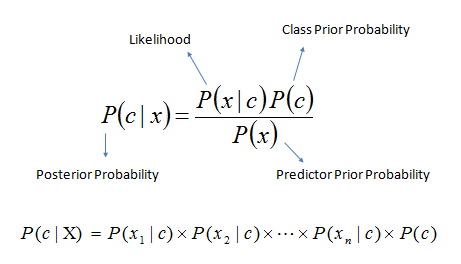


    P(c): the probability of hypothesis c being true (regardless of the data). This is known as the prior probability of c.
    P(x): the probability of the data (regardless of the hypothesis). This is known as the prior probability.
    P(c|x): the probability of hypothesis c given the data x. This is known as posterior probability.
    P(x|c): the probability of data x given that the hypothesis c was true. This is known as posterior probability.



    Step 1: Calculate the prior probability for given class labels
    Step 2: Find Likelihood probability with each attribute for each class
    Step 3: Put these value in Bayes Formula and calculate posterior probability.
    Step 4: See which class has a higher probability, given the input belongs to the higher probability class.


For a complete example showing Step 1 through Step 4, see https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn

##Example: Bag of Words Classification

OK. Let's go through an example using text. Many of you want to conduct work that includes NLP. This is the most basic example!! 

We are going to use bag of words (BoA). 

John likes to watch movies. Mary likes movies too. Each key is the word, and each value is the number of occurrences of that word in the given text document. 

BoW = {"John":1,"likes":2,"to":1,"watch":1,"movies":2,"Mary":1,"too":1}

BoW can be used to create features for classifiers. In fact, that is what we will do now!! 

The problem with BoW is that it produces a LOT of featuers. Like in the thousands. That might be a problem with logistic regression classifiers even with L2 regularization (see the Logistic Regression Classifier example). 

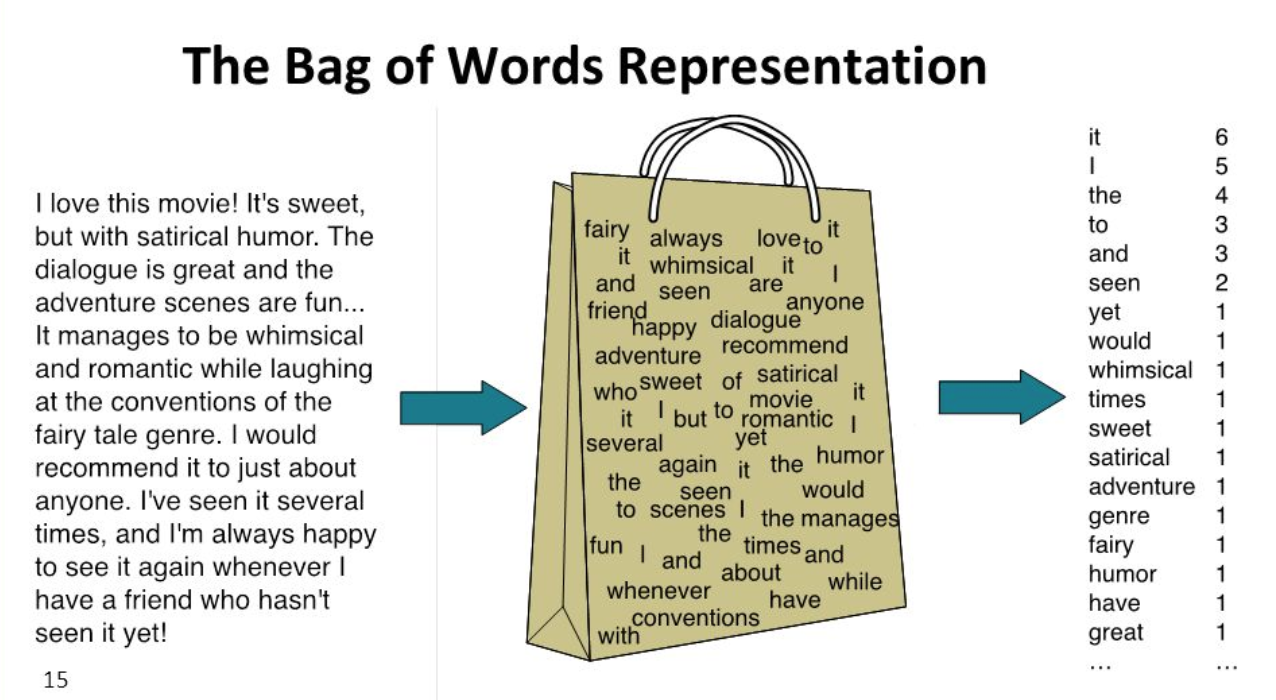

We'll use the newsgroup data set in this example. These are similar to today's subreddits. We will look at two specif groups - atheism and christian. We want a classifier that will predict whether the user posted to athiesm or chrisitan newsgroups.

In [1]:
#The target, category, or label is the category we want to predict
categories = ['alt.atheism', 'soc.religion.christian']

In [2]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':20,'figure.figsize':(15,12)})
#get the newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
#I will call this dataset news
news = fetch_20newsgroups(subset='train',categories=categories,shuffle=True, random_state=1)

In [3]:
print(news.target_names)

['alt.atheism', 'soc.religion.christian']


In [4]:
print(list(news.data[:1]))

['From: kilroy@gboro.rowan.edu (Dr Nancy\'s Sweetie)\nSubject: Re: Certainty and Arrogance\nOrganization: Rowan College of New Jersey\nLines: 122\n\nIn an earlier article, I explained that what many people find arrogant about\nChristians is that some Christians profess absolute certianty about their\nbeliefs and doctrines.  That is, many Christians insist that they CANNOT have\nmade any mistakes when discovering their beliefs, which amounts to saying\nthat they are infallible.\n\nImpicitly claiming to be infallible is pretty arrogant, most of us will\nprobably agree.\n\nIn short, the problem is that no matter how good your sources are, if any\npart of your doctrines or beliefs rest on your own thinking and reasoning,\nthen those doctrines are suspect.  So long as your own brain is involved,\nthere is a possibility for error.  I summarised the problem by writing "There\nis no way out of the loop."\n\n\nSomeone called `REXLEX\' has claimed that there IS a way out of the loop, but\nhe did

OK. Now, we want to to represent the data as a vector. That way we can use it in our classifier. We will be using the BoA method. 

This method is represetned by CountVectorizer in Sklearn

In [5]:
#get the CountVectorizer 
#to get out BoA
from sklearn.feature_extraction.text import CountVectorizer
#initialize the CountVectorizer
count_vect = CountVectorizer()
#create new presentation of the data
X_counts = count_vect.fit_transform(news.data)

In [6]:
#In order to get our data readable as an array
X_counts = X_counts.toarray()
#Now let's take a look
print(list(X_counts[1]))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

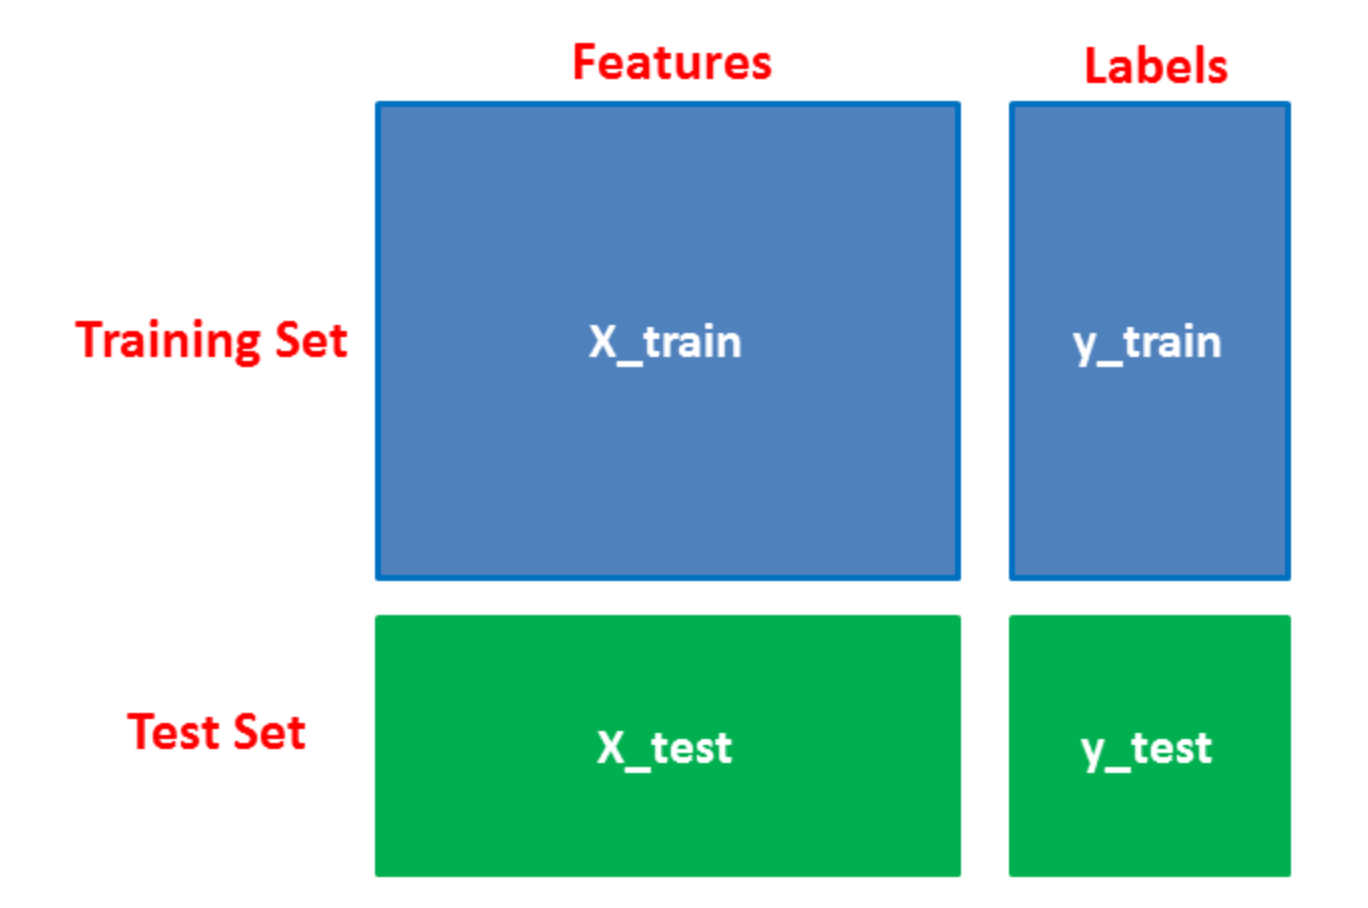

In [7]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# As with the earlier example with logistic regression classifier, 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_counts, news.target, test_size=0.3,random_state=1) 

In [8]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)


This looks like a really good model!! 

In [9]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,   7],
       [  4, 173]])

Text(0.5, 257.44, 'Predicted label')

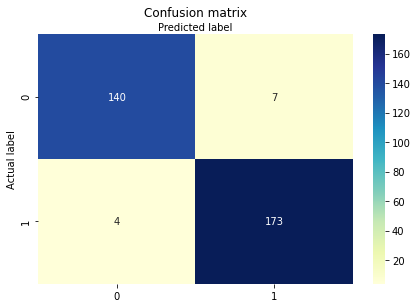

In [10]:
# import required modules
import pandas as pd
import numpy as np
#this is a different plotting package
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Now let's take a look at the metrics as we did for the logistic regression classifier

In [11]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='binary'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='binary'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='binary'))))

Accuracy:      0.9660493827160493  
Precision:     0.9611111111111111  
Recall:        0.9774011299435028  
f1 score:      0.9691876750700281  


And the ROC AUC also looks great! Look at the Logistic Regression Classifier example for more details

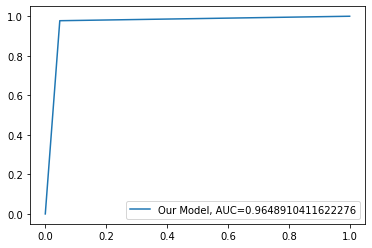

In [12]:
#source: https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python
y_pred_proba = gnb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Our Model, AUC="+str(auc))
plt.legend(loc=4)
plt.show()

Now, let's check to see what best features represent

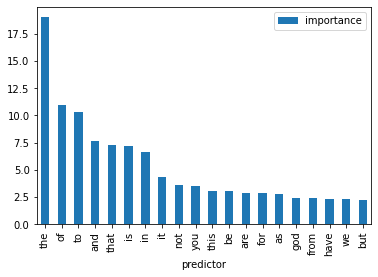

In [13]:
#get the features names from the bag of words, and the mean of each of the features per classifier (theta_)
#basically, this will give us the weight for each of the many features 
predict_score_NB = list(zip(count_vect.get_feature_names(), gnb.theta_[1]))
#create a table with the feature and associated weight
predict_score_sorted_NB = sorted(predict_score_NB, key=lambda tup: tup[1])
#let's call this feature a predictor, because it predicts one of the classes
predictions_1 = pd.DataFrame(predict_score_sorted_NB, columns=['predictor', 'importance'])\
#this is important for us to get the top predictors
predictions_1 = predictions_1.sort_values(['importance'], ascending=False)
#get top 10 predictors
top_preds = predictions_1.iloc[:20]
top_preds.plot(kind='bar', x='predictor', y='importance')

###Introducing the stop words

Hmmmm....this is not very telling...only the word "god" appears to have any meaning...otherwise, there are lots of words that are repeated a lot in English. They also carry little meaning in and of themselves. For example, words like "the" "of" "to" "and" "that" "is". 

These are all called stop words. "Stop words are words which are filtered out before or after processing of natural language data (text). Though "stop words" usually refers to the most common words in a language, there is no single universal list of stop words used by all natural language processing tools, and indeed not all tools even use such a list. Some tools specifically avoid removing these stop words to support phrase search" [1]

References:

[1] https://en.wikipedia.org/wiki/Stop_word

Let's see what happens when we take out stop words (e.g., and;the;a; etc. )

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(news.data).toarray()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, news.target, test_size=0.3,random_state=1) 

In [16]:
#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [17]:
#import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[140,   7],
       [  4, 173]])

In [18]:
print('{:<15s}{:<20s}'.format('Accuracy:',str(metrics.accuracy_score(y_test,y_pred))))
print('{:<15s}{:<20s}'.format('Precision:',str(metrics.precision_score(y_test,y_pred,average='binary'))))
print('{:<15s}{:<20s}'.format('Recall:',str(metrics.recall_score(y_test,y_pred, average='binary'))))
print('{:<15s}{:<20s}'.format('f1 score:',str(metrics.f1_score(y_test,y_pred, average='binary'))))

Accuracy:      0.9660493827160493  
Precision:     0.9611111111111111  
Recall:        0.9774011299435028  
f1 score:      0.9691876750700281  


Now let's take a look at the top words...this makes a lot more sense, does it not?

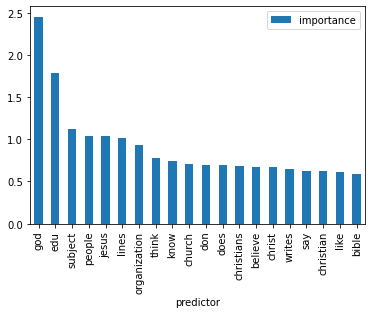

In [19]:
predict_score_NB = list(zip(count_vect.get_feature_names(), gnb.theta_[1]))
predict_score_sorted_NB = sorted(predict_score_NB, key=lambda tup: tup[1])
predictions_1 = pd.DataFrame(predict_score_sorted_NB, columns=['predictor', 'importance'])
predictions_1 = predictions_1.sort_values(['importance'], ascending=False)
#get top 10 predictors
top_preds = predictions_1.iloc[:20]
#plot top 10 predictors
top_preds.plot(kind='bar', x='predictor', y='importance')

##Advantages

1. It is not only a simple approach but also a fast and accurate method for prediction.
2. Naive Bayes has very low computation cost.
3. It can efficiently work on a large dataset.
4. It performs well in case of discrete response variable compared to the continuous variable.
5. It can be used with multiple class prediction problems.
6. It also performs well in the case of text analytics problems.
7. When the assumption of independence holds, a Naive Bayes classifier performs better compared to other models like logistic regression.


##Disadvantages

The assumption of independent features. In practice, it is almost impossible that model will get a set of predictors which are entirely independent.